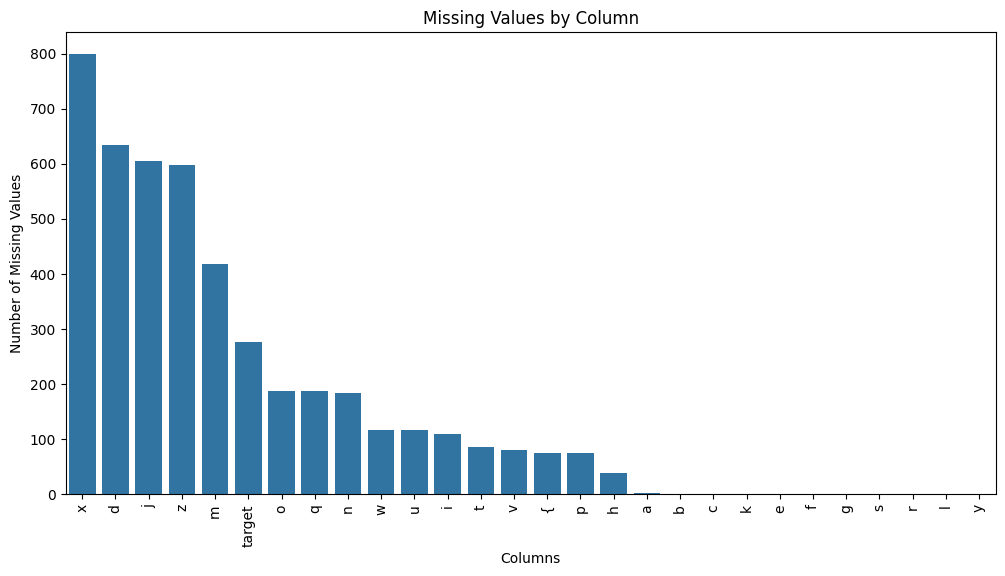

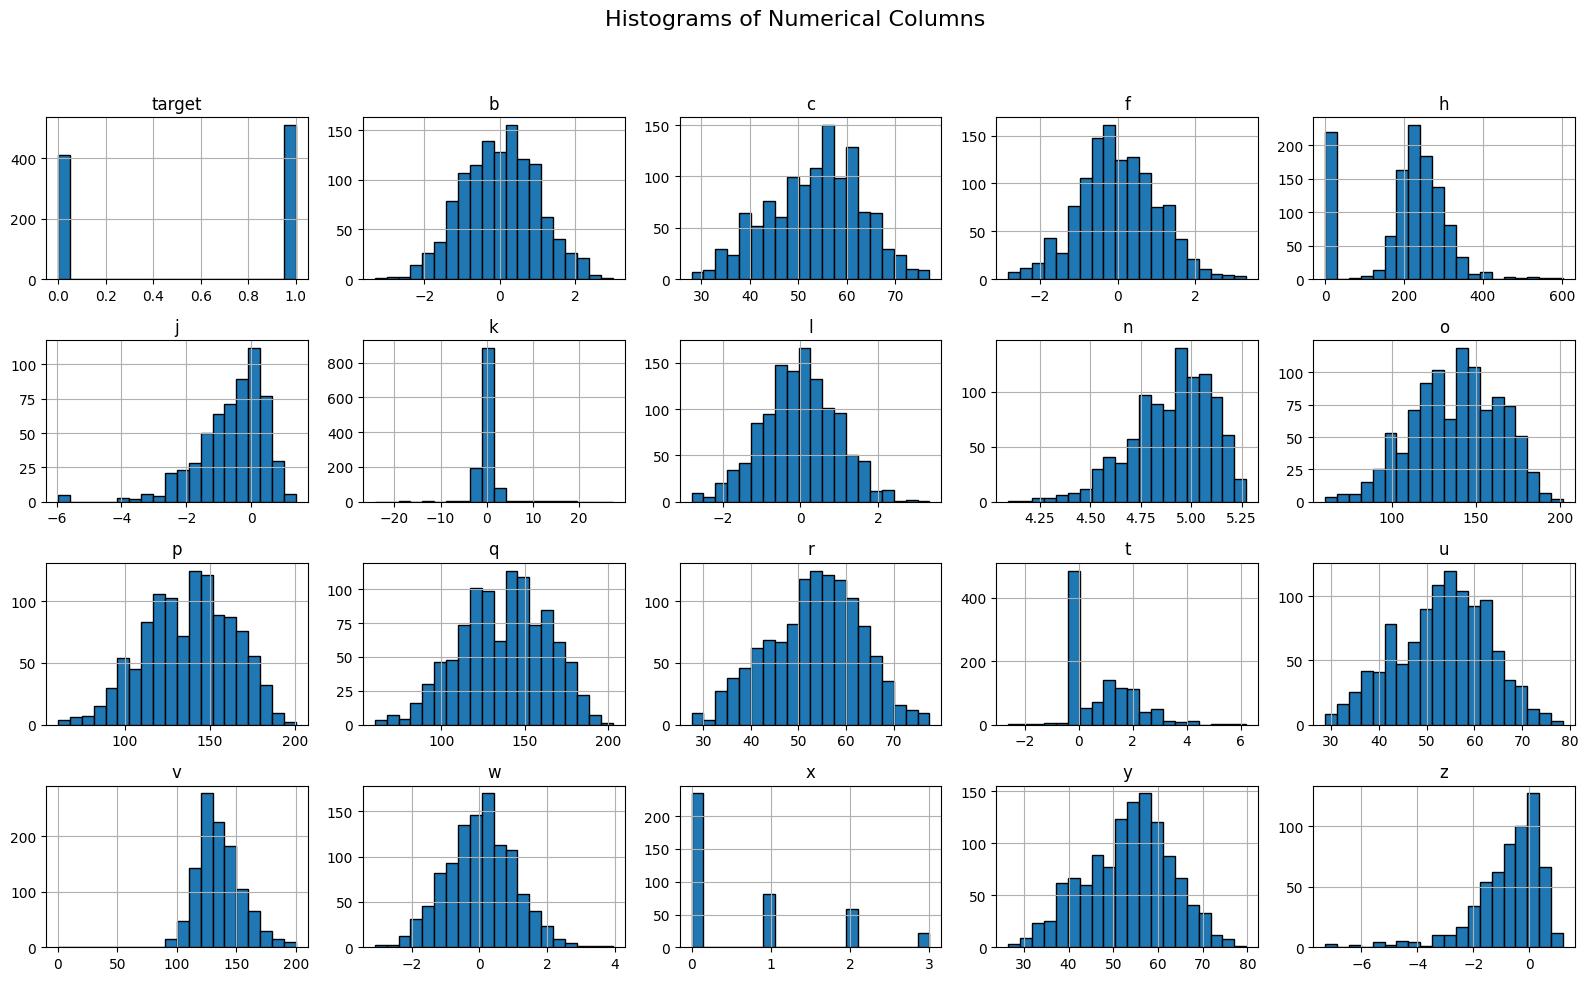

/var/folders/s1/61b5vb6n7_n0wff6fjv_v7gr0000gn/T/ipykernel_7384/456088201.py:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_data[col] = input_data[col].fillna(input_data[col].mode()[0])


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Import necessary modules
import seaborn as sns
import matplotlib.pyplot as plt
import data_preprocessor as dp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()

messy_data.head()
messy_data.info()
messy_data.describe()

missing_values = messy_data.isnull().sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values by Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()


numerical_columns = messy_data.select_dtypes(include=["float64", "int64"]).columns


messy_data[numerical_columns].hist(bins=20, figsize=(16, 12), layout=(5, 5), edgecolor="black")
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



clean_data = dp.impute_missing_values(clean_data, strategy='mean')

clean_data = dp.impute_missing_values(clean_data, strategy= 'mode')

clean_data = dp.remove_duplicates(clean_data)

clean_data = dp.normalize_data(clean_data)

clean_data = dp.remove_redundant_features(clean_data)


# 4. Train and evaluate the model
dp.simple_model(clean_data)


removed_rows = len(messy_data) - len(clean_data)
print("{removed_rows}")


